In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.vgg16 import preprocess_input

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(None, None, 3))
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

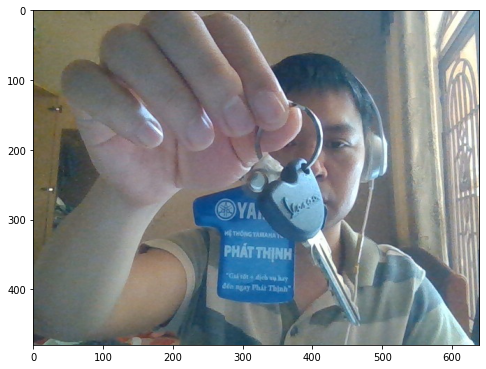

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

PATH = '/content/gdrive/My Drive/data/tracking_images/'
image_t1 = kimage.load_img(PATH+'img'+str(0)+'.jpg', target_size=(480, 640))

plt.figure(figsize=(8,8))
plt.imshow(image_t1)

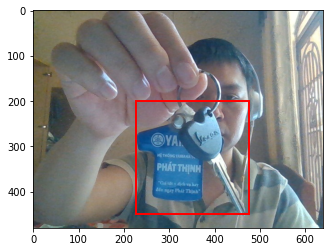

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

fig, ax = plt.subplots()
ax.imshow(image_t1)

x = 227
y = 200
side = 250

rect = patches.Rectangle((x,y), side, side, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

In [ ]:
# get template
image_t1_np = kimage.img_to_array(image_t1)
print(image_t1_np.shape)

template_t1 = image_t1_np[y:y+side, x:x+side, :]
print(template_t1.shape)

(480, 640, 3)
(250, 250, 3)


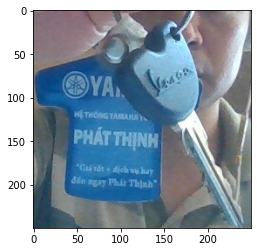

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(template_t1/255.0)
plt.show()

In [ ]:
# compute features for template_t1
template_t1 = np.expand_dims(template_t1, axis=0)
template_t1_features = model.predict(template_t1)
print(template_t1_features.shape)

(1, 7, 7, 512)


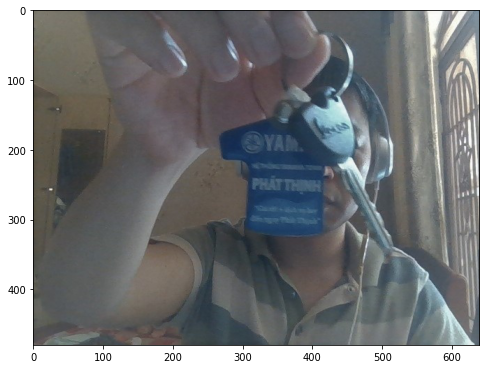

In [ ]:
# next frame
PATH = '/content/gdrive/My Drive/data/tracking_images/'
image_t2 = kimage.load_img(PATH+'image_diffCondition.jpg', target_size=(480, 640))

plt.figure(figsize=(8,8))
plt.imshow(image_t2)

In [ ]:
# compute features for image_t2
image_t2 = np.expand_dims(image_t2, axis=0)
image_t2_features = model.predict(image_t2)
print(image_t2_features.shape)

(1, 15, 20, 512)


In [ ]:
# matching
side = 7
sim_data = []
for i in range(15-side+1):
  for j in range(20-side+1):
    template_t2_features = image_t2_features[0,i:i+side,j:j+side,:]
    sim = cosine_similarity(np.reshape(template_t2_features, (1, -1)), np.reshape(template_t1_features, (1,-1)))
    sim_data.append((sim[0][0], i, j))

print(len(sim_data))

126


In [ ]:
def getKey(item):
    return item[0]
    
tp_sorted = sorted(sim_data, key=getKey, reverse=True)
print(tp_sorted[:3])

[(0.4376149, 3, 8), (0.40127328, 3, 9), (0.30319715, 2, 8)]


<Figure size 1152x1152 with 0 Axes>

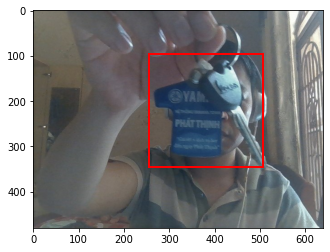

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

plt.figure(figsize=(16,16))
fig, ax = plt.subplots()

# Display the image
ax.imshow(image_t2[0])

# Create a Rectangle patch
scale_height = 480//15
scale_width  = 640//20
for i in range(1): 
  rect = patches.Rectangle((tp_sorted[i][2]*scale_width, tp_sorted[i][1]*scale_height), 
                           250, 250, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)

plt.show()